# Trabalho 01: Filtros de Fase Linear e Janelamento

In [783]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import group_delay, butter, freqz, lfilter, firwin

## Parte 01

### Questão 01
Gere um sinal de entrada x[n] que é a soma de três funções cosseno com frequências 
angulares   iguais   a   0,2π,   0,5π   e   0,8π,   e   amplitudes   iguais   a  1.  Este  sinal   deve   possuir 
N=200 pontos. Gere o gráfico do módulo da Transformada de Fourier deste sinal x[n] 
em dB. Não esqueça de colocar as frequências corretas no eixo x. Explique, em forma de 
comentário em seu código, se a módulo da Transformada de Fourier está de acordo com o 
esperado. 

1. Criando o sinal x[n]

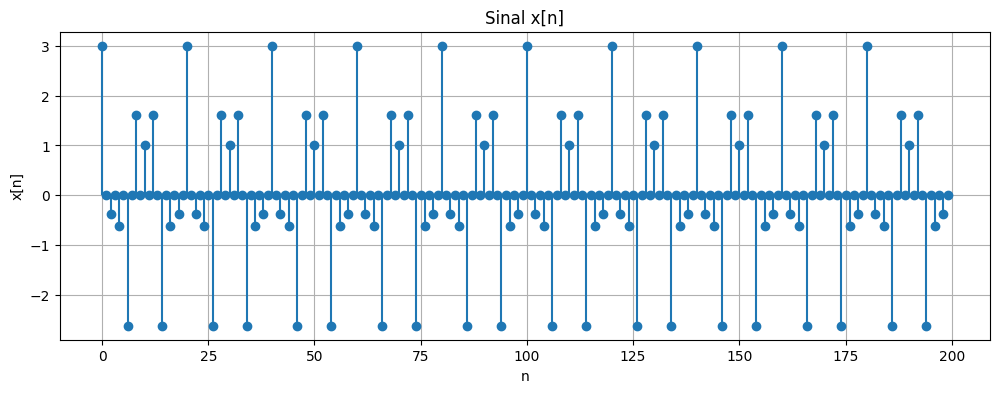

In [784]:
# Número de pontos
N = 200

# Vetor de amostras
n = np.arange(N)

# Criando os cossenos
x1_n = np.cos(0.2 * np.pi * n)
x2_n = np.cos(0.5 * np.pi * n)
x3_n = np.cos(0.8 * np.pi * n)

x_n = x1_n + x2_n + x3_n

# Plotando o sinal x_n
plt.figure(figsize=(12,4))
plt.stem(n, x_n, basefmt=" ")
plt.xlabel("n")
plt.ylabel("x[n]")
plt.title("Sinal x[n]")
plt.grid(True)
plt.show()

2. Fazendo a transformada de Fourier discreta:

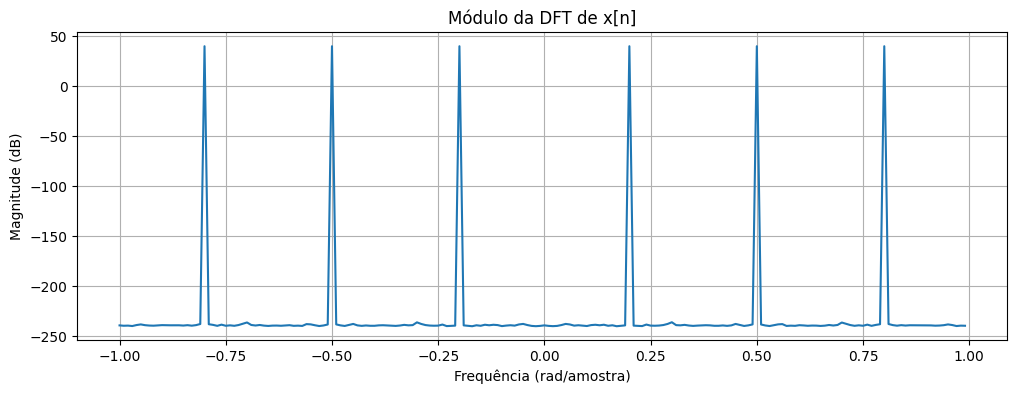

In [785]:
X = np.fft.fft(x_n)
# centralizando em -pi..pi (Detalhes do python)
X_shift = np.fft.fftshift(X)     

# Calculando magnitude em dB
mag = np.abs(X_shift)
mag_db = 20 * np.log10(mag + 1e-12) 

# Eixo de frequência em rad/amostra
omega = np.linspace(-np.pi, np.pi, N, endpoint=False)

# Frequência normalizada
omega_norm = omega / np.pi

# Plotando o gráfico do módulo da FFT
plt.figure(figsize=(12,4))
plt.plot(omega_norm, mag_db)
plt.xlabel("Frequência (rad/amostra)")
plt.ylabel("Magnitude (dB)")
plt.title("Módulo da DFT de x[n]")
plt.grid(True)
plt.show()


#### Explicação

Sim, o módulo da Tranformada de Fourier saiu como esperado, já que o sinal analisado é composto de cossenos com frequências 0.2, 0.5 e 0.8 radianos por amostra:

$$
x[n] = \cos(0.2\pi n) + \cos(0.5\pi n) + \cos(0.8\pi n)
$$


Como já é conhecido, a transformada de fourier de um cosseno são dois impulsos simétricos na mesma frequência do cosseno (isso é esperado, já que a TF extrai as frequências características de um sinal e o cosseno possui apenas 1 frequência).

Como a transformada de Fourier é linear (obedece a superposição e Homogeneidade), a transformada de fourier do sinal $x_n$ é a soma das TF dos sinais que a compoem:

$$ 
X(e^{j\omega}) = \mathcal{F}\{x[n]\} = \mathcal{F}\{\cos(0.2\pi n)\} +  \mathcal{F}\{\cos(0.5\pi n)\} + \mathcal{F}\{\cos(0.8\pi n)\}
$$

Como cada cosseno gera dois picos simétricos em frequência, espera-se observar picos em:

$$
|\omega| = \{0.2\pi,\; 0.5\pi,\; 0.8\pi\}
$$

Que são justamente os valores:
$$
|\omega| = \{0.628,\; 1.571,\; 2.513\}
$$

Em que estão os picos no gráfico do módulo da transformada de Fourier de $x_n$



### Questão 02: 
Gere  a  resposta   ao   impulso  h[n]  de   um  filtro   passa-baixa   FIR   usando   truncamento 
(janela retangular) a partir um filtro passa-baixa ideal com frequência de corte igual a 0,65π  e atraso α=15. A resposta ao impulso deste filtro deve ser não nula de 0 até M=2 α=30. Gere  o gráfico do módulo da Resposta em Frequência deste sistema em dB  (ou seja, da  Transformada   de   Fourier  da   resposta   ao   impulso   h[n]).   Não   esqueça   de   colocar   as  frequências   corretas   no   eixo   x.  Explique,   em   forma   de   comentário   em   seu   código,   se   a  módulo da Resposta em Frequência  está de acordo com o esperado. 


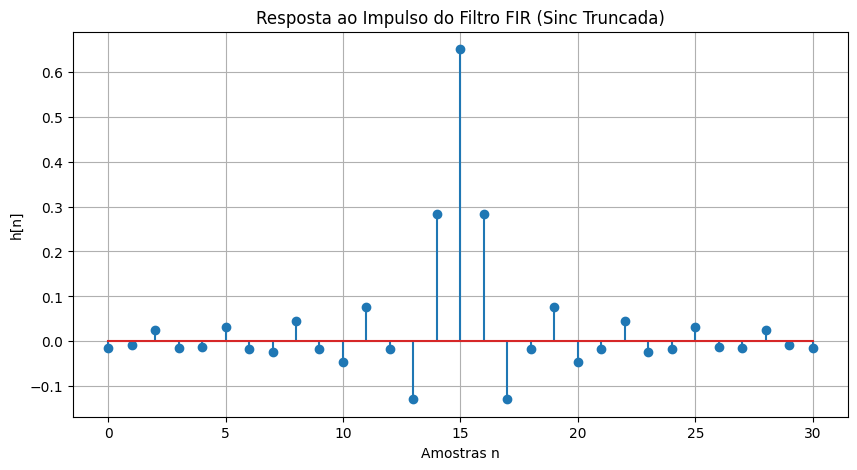

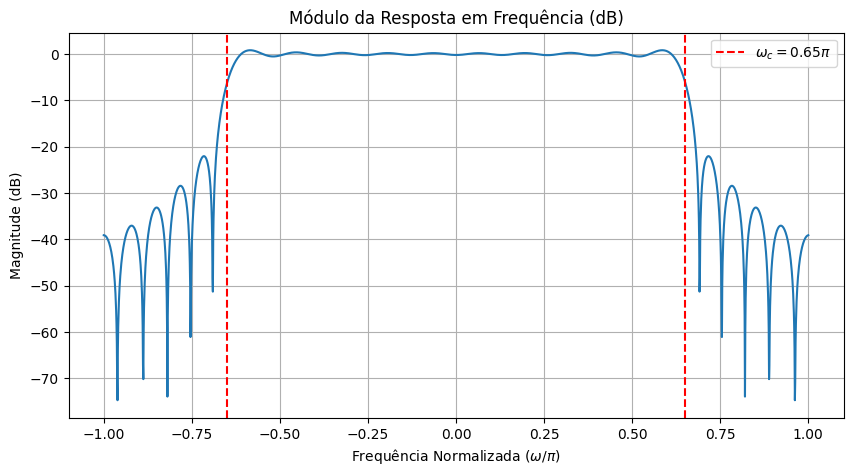

In [786]:
# Parâmetros do filtro
wc = 0.65 * np.pi     # frequência de corte
alpha = 15            # atraso (centro do filtro)
M = 2 * alpha         # comprimento total = 30
n = np.arange(0, M+1) # n = 0 ... 30

# Modelando uma resposta ao impulso ideal do filtro passa baixa:
# h_ideal[n] = sin(wc (n - alpha)) / (pi (n - alpha))
h_ideal = np.zeros_like(n, dtype=float)

for i, ni in enumerate(n):
    if ni == alpha:
        # limite de sin(x)/x = wc/pi
        h_ideal[i] = wc / np.pi
    else:
        h_ideal[i] = np.sin(wc * (ni - alpha)) / (np.pi * (ni - alpha))

# Janela retangular
w = np.ones(M+1)

# Truncamento do filtro
h = h_ideal * w 

# Transformada de Fourier (FFT)
Nfft = 2048
H = np.fft.fft(h, Nfft)
H_shift = np.fft.fftshift(H)

# eixo de frequências
omega = np.linspace(-np.pi, np.pi, Nfft)  

# Eixo das frequências normalizado
omega_norm = omega / np.pi

# Frequência de corte normalizada
wc_norm = wc / np.pi

# Módulo em dB
H_dB = 20 * np.log10(np.abs(H_shift) + 1e-12)

# Gráfico da resposta ao impulso (sinc truncada)
plt.figure(figsize=(10,5))
plt.stem(n, h)
plt.title("Resposta ao Impulso do Filtro FIR (Sinc Truncada)")
plt.xlabel("Amostras n")
plt.ylabel("h[n]")
plt.grid(True)
plt.show()

# Gráfico da resposta em frequência
plt.figure(figsize=(10,5))
plt.plot(omega_norm, H_dB)
plt.title("Módulo da Resposta em Frequência (dB)")
plt.xlabel(r"Frequência Normalizada ($\omega/ \pi$)") 
plt.ylabel("Magnitude (dB)")
plt.grid(True)
plt.axvline(wc_norm, color='r', linestyle='--', label=r'$\omega_c = 0.65\pi$')  # Linha marcando wc_norm
plt.axvline(-wc_norm, color='r', linestyle='--')                                # Linha marcando -wc_norm
plt.legend()
plt.show()

#### Explicação
Sim, o resultado está conforme o esperado para um filtro não ideal. Em um filtro ideal, era esperado que, no domínio da frequência, ouvessem as seguintes características:
- Magnitude (Ideal): Ganho unitário (0 dB) na banda passante ($|\omega| < 0.65\pi$) e ganho zero ($-\infty$ dB) na banda de rejeição ($|\omega| > 0.65\pi$). A transição de banda é instantânea (vertical).$$|H_{\text{ideal}}(e^{j\omega})| = \begin{cases} 1 \implies 0 \text{ dB}, & |\omega| < 0.65\pi \\ 0 \implies -\infty \text{ dB}, & |\omega| > 0.65\pi \end{cases}$$


O que obtive foi o resultado esperado para um filtro FIR real de comprimento finito ($M=30$), obtido pelo truncamento da resposta ao impulso ideal $h_{lp}[n]$ com uma janela retangular. Observando o gráfico gerado, percebemos que:
- Há um Ripple na Banda Passante: A magnitude não é perfeitamente plana em 0 dB. Ela oscila ligeiramente acima e abaixo de 0 dB na região $|\omega| < 0.65\pi$.
- Há um Ripple na Banda de Rejeição: A magnitude não é zero (infinito negativo em dB). Ela apresenta oscilações periódicas (sidelobes) que diminuem lentamente à medida que a frequência se afasta de $\omega_c$. A rejeição máxima alcançada é limitada (não chega a $-\infty$ dB).
- Transição Não-Ideal: A transição da banda passante para a banda de rejeição não é vertical (abrupta), mas sim gradual.

A razão para a não obtenção de um filtro ideal é devido ao Fenômeno de Gibbs. As imperfeições observadas (ondulações e transição gradual) são uma característica intrínseca do método de truncamento utilizado.
- O truncamento de uma série infinita (a $\text{sinc}$ ideal) usando uma janela retangular no domínio do tempo corresponde a uma convolução no domínio da frequência (produto no tempo $ \Leftrightarrow$ convolução na frequência). A convolução da função de transferência ideal (retângulo) com a $\text{sinc}$ (Transformada de Fourier da janela retangular) resulta nas oscilações (Gibbs) na vizinhança da descontinuidade (a frequência de corte $\omega_c$). O resultado do filtro é o esperado para o método de janelamento retangular, mas não para o filtro ideal puro.

### Questão 03
Gere o gráfico da resposta em fase deste sistema (com fase contínua, usando unwrap). Não esqueça de colocar as frequências corretas no eixo x. Explique, em forma de comentário em seu código, se a fase da Resposta em Frequência está de acordo com o esperado.

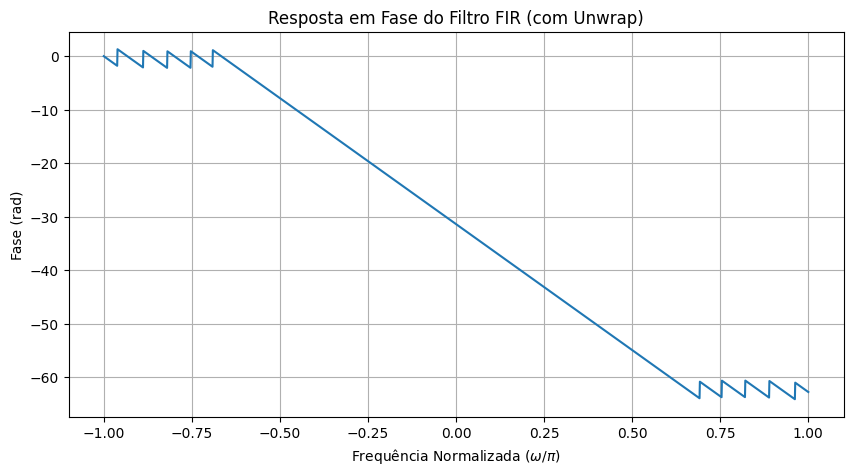

In [787]:
# Calculando a fase da FFT deslocada (H_shift)
fase = np.angle(H_shift)

# Fase contínua usando unwrap
fase_unwrapped = np.unwrap(fase)

# Gráfico da fase com frequência normalizada
plt.figure(figsize=(10,5))
plt.plot(omega_norm, fase_unwrapped)
plt.title("Resposta em Fase do Filtro FIR (com Unwrap)")
plt.xlabel(r"Frequência Normalizada ($\omega/ \pi$)")
plt.ylabel("Fase (rad)")
plt.grid(True)
plt.show()

#### Explicação
Sim, a fase está de acordo com o esperado. A fase é linear (gráfico com linha reta na banda passante, isto é, até $ \omega_c = 0.65\pi$), indicando que todas as componentes de frequência sofrem o mesmo atraso (atraso de grupo constante). Isso é necessário para não alterar a forma do sinal ao longo do tempo. Se a fase não fosse linear, haveria distorção no sinal porque as frequências seriam atrasadas de formas diferentes. A linearidade da fase já era esperada devido a:  
1. o filtro em questão é simétrico (filtro simétrico $\Rightarrow$ fase linear)
2. A inclinação negativa da reta é $\mathbf{-15}$ radianos (o valor do atraso $n_d = \alpha = 15$), pois a fase teórica é $\Phi(\omega) = -\omega n_d$.

Como $n_d = \alpha = 15$ é constante, a fase é uma reta com inclinação negativa de $-15$.

Quanto aos pequenos picos e oscilações observados nas bordas e na banda de rejeição, esses picos são naturais, já que nessa região, o ganho (magnitude) do filtro é muito baixo (próximo de zero), tornando o cálculo da fase instável e irrelevante. O que importa é que a fase é linear onde a magnitude é significativa (na banda passante).

### Questão 4
Gere o gráfico do atraso de grupo deste sistema (pode usar a função pronta para o cálculo do atraso de grupo). Não esqueça de colocar as frequências corretas no eixo x. Explique, em forma de comentário em seu código, se o atraso de grupo está de acordo com o esperado.

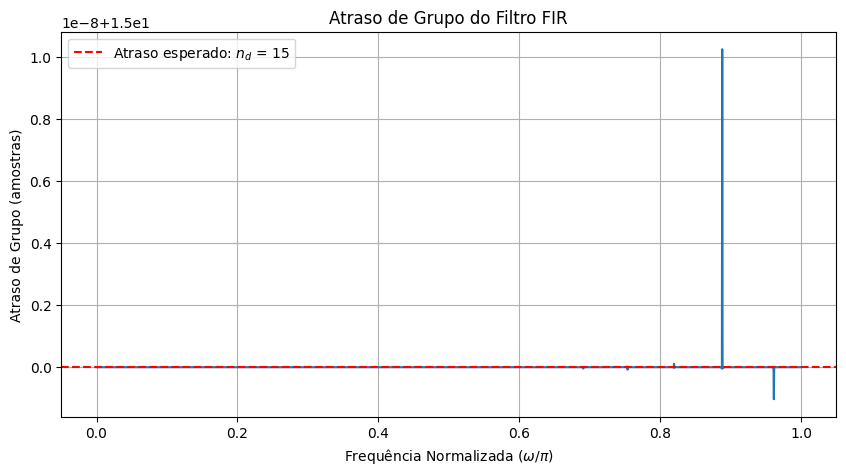

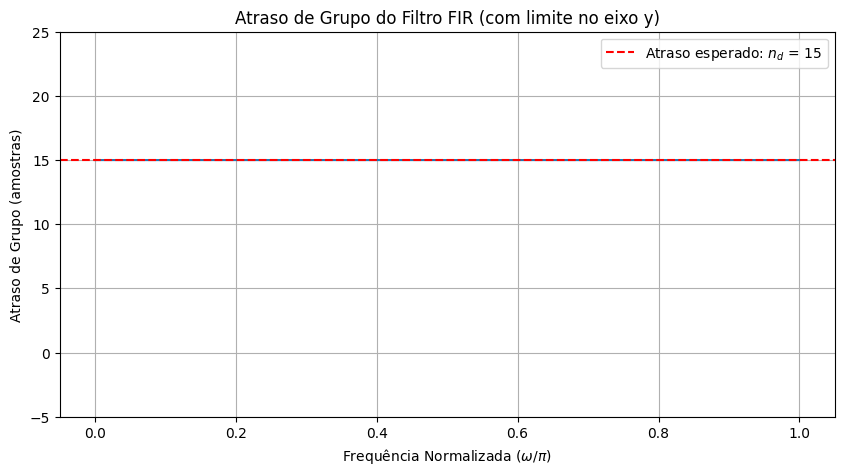

In [788]:
# Gera eixo de frequências para o atraso de grupo
w_vec = np.linspace(0, np.pi, Nfft)

# Calculando o atraso de grupo
w_gd, gd = group_delay((h, 1), w=w_vec) 

# Frequência normalizada
omega_norm_gd = w_gd / np.pi

# Gráfico do atraso de grupo sem limitação no eixo y
plt.figure(figsize=(10,5))
plt.plot(omega_norm_gd, gd)
plt.title("Atraso de Grupo do Filtro FIR")
plt.xlabel(r"Frequência Normalizada ($\omega/ \pi$)")
plt.ylabel("Atraso de Grupo (amostras)")
plt.grid(True)

# Linha com atraso teórico
plt.axhline(alpha, color='r', linestyle='--', label=f"Atraso esperado: $ n_d$ = {alpha}")

plt.legend()
plt.show()


# Gráfico do atraso de grupo com limitação no eixo y
plt.figure(figsize=(10,5))
plt.plot(omega_norm_gd, gd)
plt.title("Atraso de Grupo do Filtro FIR (com limite no eixo y)")
plt.xlabel(r"Frequência Normalizada ($\omega/ \pi$)")
plt.ylabel("Atraso de Grupo (amostras)")
plt.grid(True)

# Linha com atraso teórico
plt.axhline(alpha, color='r', linestyle='--', label=f"Atraso esperado: $ n_d$ = {alpha}")

plt.ylim(-5, 25) 

plt.legend()
plt.show()

#### Explicação
Sim, o atraso de grupo está conforme o esperado.
Para um filtro FIR com resposta ao impulso simétrica e ordem $M=30$, o Atraso de Grupo teórico $T_g(\omega)$ deve ser constante em todas as frequências:$$T_g(\omega) = \frac{d}{d\omega} \left(-\Phi(\omega)\right)$$Como a fase é $\Phi(\omega) = -\omega \alpha$ (com $\alpha = n_d = 15$), o atraso de grupo esperado é:$$T_g(\omega) = \alpha = \mathbf{15 \text{ amostras}}$$


O gráfico gerado demostra que:
- Na Banda Passante ($0 \le \omega/\pi \le 0.65$), o Atraso de Grupo calculado é constante em 15 amostras, sobrepondo-se perfeitamente à linha de referência. Isso garante que todas as componentes de frequência dentro da banda passante são atrasadas pelo mesmo número de amostras ($n_d = 15$).

- Na Banda de Rejeição ($\omega/\pi > 0.65$), o Atraso de Grupo se torna instável e oscilatório (os picos gigantescos no gráfico original).Motivo: Nesta região, a magnitude do filtro é próxima de zero, e a função $\Phi(\omega)$ se torna numericamente instável, levando a valores absurdos na sua derivada. Este comportamento é esperado e não afeta o desempenho do filtro, pois as frequências nesta banda já foram atenuadas. A estabilidade do $T_g(\omega)$ em $n_d = 15$ na banda passante é a prova de que o filtro opera conforme o princípio do atraso de grupo constante .

### Questão 05
Filtre o sinal x[n] da Questão 1 usando a resposta ao impulso h[n] gerada na Questão 2. Gere o gráfico do módulo da Transformada de Fourier da saída y[n] em dB. Não esqueça de colocar as frequências corretas no eixo x. Explique, em forma de comentário em seu código, se o módulo da Transformada de Fourier do sinal filtrado está de acordo com o esperado.

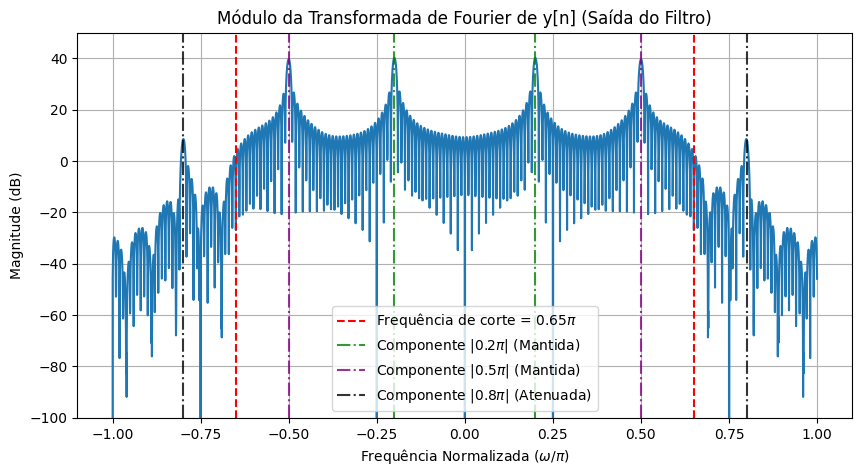

In [789]:
# x_n (Sinal de Entrada - Soma de 3 Cossenos)
N_sinal = 200
n_x = np.arange(N_sinal)
x_n = np.cos(0.2 * np.pi * n_x) + np.cos(0.5 * np.pi * n_x) + np.cos(0.8 * np.pi * n_x)

# Saída y[n] = x[n] * h[n]
y_n = np.convolve(x_n, h)

# FFT da saída
Nfft = 4096
Y = np.fft.fft(y_n, Nfft)
Y_shift = np.fft.fftshift(Y)

omega = np.linspace(-np.pi, np.pi, Nfft)
omega_norm = omega / np.pi

Y_dB = 20 * np.log10(np.abs(Y_shift) + 1e-12)

# Frequências a serem marcadas (Normalizadas)
freqs_passante_02 = 0.2
freqs_passante_05 = 0.5
freqs_rejeicao = 0.8
wc_norm = wc / np.pi

# Gráfico da FFT da saída
plt.figure(figsize=(10,5))
plt.plot(omega_norm, Y_dB)
plt.title("Módulo da Transformada de Fourier de y[n] (Saída do Filtro)")
plt.xlabel(r"Frequência Normalizada ($\omega/\pi$)")
plt.ylabel("Magnitude (dB)")
plt.grid(True)
plt.ylim(-100, 50)

# Linhas da Frequência de Corte (Vermelho tracejado)
plt.axvline(wc_norm, color='r', linestyle='--', label=r"Frequência de corte = $0.65\pi$")
plt.axvline(-wc_norm, color='r', linestyle='--')

# Linhas das Componentes de cosseno

# Frequência 0.2 pi (Banda Passante) - Cor Azul
plt.axvline(freqs_passante_02, color='g', linestyle='-.', alpha=0.8, linewidth=1.5, label=r"Componente $|0.2\pi|$ (Mantida)")
plt.axvline(-freqs_passante_02, color='g', linestyle='-.', alpha=0.8, linewidth=1.5)

# Frequência 0.5 pi (Banda Passante) - Cor Laranja/Amarela
plt.axvline(freqs_passante_05, color='purple', linestyle='-.', alpha=0.8, linewidth=1.5, label=r"Componente $ |0.5\pi|$ (Mantida)")
plt.axvline(-freqs_passante_05, color='purple', linestyle='-.', alpha=0.8, linewidth=1.5)

# Frequência 0.8 pi (Banda de Rejeição) - Cor Verde
plt.axvline(freqs_rejeicao, color='k', linestyle='-.', alpha=0.8, linewidth=1.5, label=r"Componente $|0.8\pi|$ (Atenuada)")
plt.axvline(-freqs_rejeicao, color='k', linestyle='-.', alpha=0.8, linewidth=1.5)


plt.legend()
plt.show()

#### Explicação

Sim, o resultado foi como esperado. As frequências menores que 0.65 $\pi$ (0.2 $\pi$ e 0.5 $\pi$) foram mantidas ($\omega < 0.65\pi$). Isso é perceptível pelos picos de magnitude nessas frequências. Já as frequências maiores que 0.65 $\pi$ ($\omega > 0.65\pi$) drasticamente atenuadas. É notável que a frequência de 0.8 $\pi$ nao foi totalmente cortada, mas se analisarmos o gráfico do filtro em decibeis (questão 02), esse resultado é esperado, já que de fato o filtro FIR com janela retangular não possui atenuação infinita na banda de rejeição.

### Questão 06

O sinal de saída y[n] deve ser, de forma aproximada, igual a um sinal g[n] que corresponde à soma de dois cossenos com frequências angulares igual a 0,2π e 0,5π, mas com um atraso igual a α. Para saber se isto realmente está acontecendo, gere, em um mesmo gráfico, os sinais g[n-α] e y[n], e comente se estes sinais são parecidos e sincronizados.

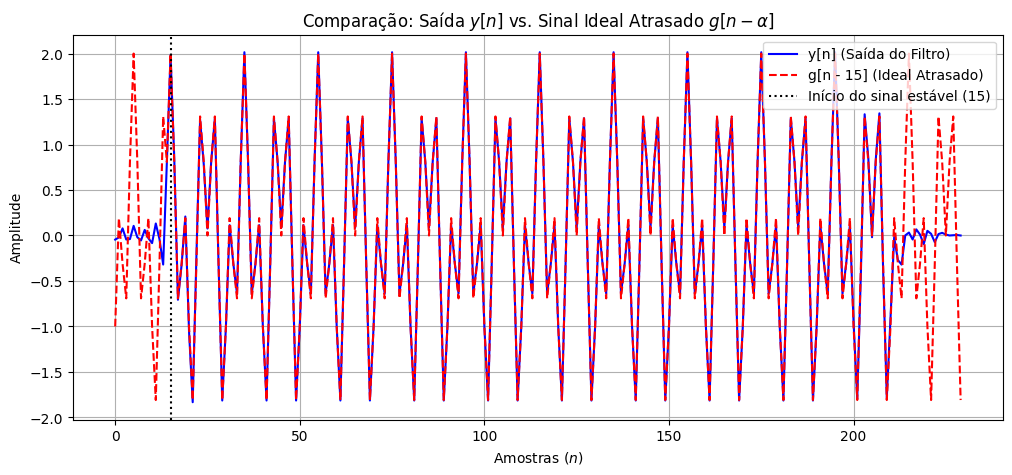

In [790]:
# Parâmetros usados: N_sinal=200, M=30, alpha=15
N_sinal = 200
alpha = 15 
wc = 0.65 * np.pi

# Novo vetor de amostras n (0 a 229)
L = len(y_n)
n_y = np.arange(L) 

# Geração do sinal ideal G[n] com comprimento da saída (L)
g_ideal_completo = np.cos(0.2 * np.pi * n_y) + np.cos(0.5 * np.pi * n_y) 

#  Atrasando G[n] (G[n - alpha])
g_shifted = np.roll(g_ideal_completo, alpha) 

# # Corrigindo o Transiente: Zero os primeiros alpha pontos 
# g_shifted[:alpha] = 0

# Plotando o gráfico
plt.figure(figsize=(12,5))
plt.plot(n_y, y_n, label="y[n] (Saída do Filtro)", linewidth=1.5, color='blue')
plt.plot(n_y, g_shifted, '--', label=f"g[n - {alpha}] (Ideal Atrasado)", linewidth=1.5, color='red')
plt.title("Comparação: Saída $y[n]$ vs. Sinal Ideal Atrasado $g[n-\\alpha]$")
plt.xlabel("Amostras ($n$)")
plt.ylabel("Amplitude")
plt.axvline(alpha, color='k', linestyle=':', label=f"Início do sinal estável ({alpha})")
plt.grid(True)
plt.legend()
plt.show()

#### Explicação
Sim, o alinhamento dos gráficos sicronizados a partir de 15 amostras mostra que o atraso de grupo aplicado pelo filtro realmente é de 15 amostras, exatamente igual ao atraso teórico, como se espera. Além disso, o filtro filtrou muito bem a componente de frequência em $0.8 \pi$ e preservou as componentes $0.2 \pi$ e $ 0.5\pi$. Essas ondulações no início e no final do filtro são devido ao ripple na banda passante do filtro FIR

Portanto, o gráfico mostra que no domínio do tempo, o filtro foi bem-sucedido em isolar os componentes de frequência desejados e aplicou o atraso de tempo constante esperado (15 amostras) sem distorção de fase muito evidentes.

## Parte 02:

### Questão 07
Gere os coeficientes ak e bk da equação de diferenças de um filtro passa-baixa IIR de Butterworth com frequência de corte igual a 0,65π e ordem igual a 8. Use uma função pronta para gerar o filtro de Butterworth. Gere o gráfico do módulo da Resposta em Frequência deste sistema em dB. Não esqueça de colocar as frequências corretas no eixo x. Explique, em forma de comentário em seu código, se a módulo da Resposta em Frequência está de acordo com o esperado.

Coeficientes bk (numerador):
[0.04879474 0.39035791 1.36625267 2.73250535 3.41563168 2.73250535
 1.36625267 0.39035791 0.04879474]

Coeficientes ak (denominador):
[1.00000000e+00 2.38697983e+00 3.36960116e+00 2.96409892e+00
 1.79747431e+00 7.38048925e-01 2.00473711e-01 3.23942876e-02
 2.38186806e-03]


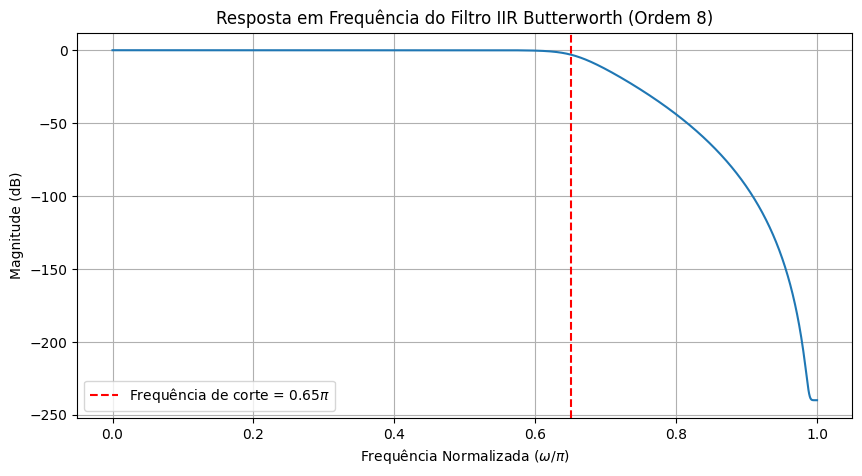

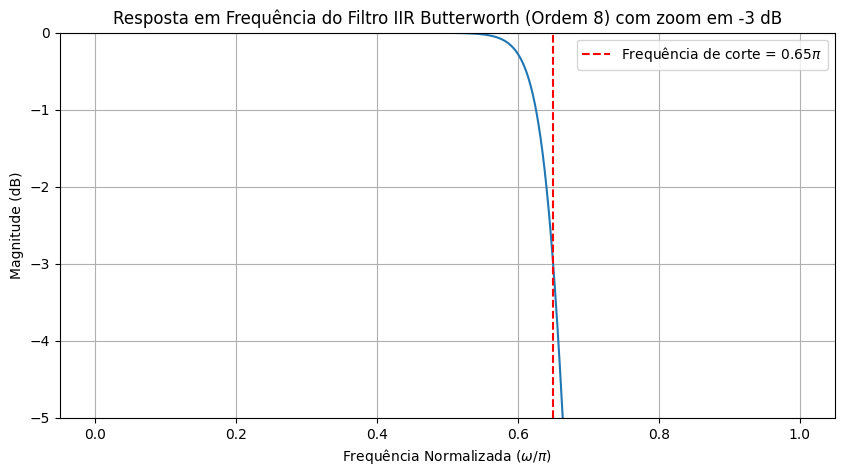

In [791]:

# Parâmetros do filtro
wc_norm = 0.65       # frequência de corte normalizada: wc / pi
ordem = 8            # ordem do filtro

# Geração dos coeficientes do filtro IIR Butterworth
b, a = butter(ordem, wc_norm, btype='low', analog=False)

print("Coeficientes bk (numerador):")
print(b)
print("\nCoeficientes ak (denominador):")
print(a)

# Cálculo da resposta em frequência

# freqz retorna w (rad/sample) e H(e^{jw})
w, H = freqz(b, a, worN=2048)

# Normalização do eixo frequencial: omega/pi
omega_norm = w / np.pi

# Módulo em dB
H_dB = 20 * np.log10(np.abs(H) + 1e-12)

# Gráfico da magnitude em frequência
plt.figure(figsize=(10,5))
plt.plot(omega_norm, H_dB, linewidth=1.5)
plt.title("Resposta em Frequência do Filtro IIR Butterworth (Ordem 8)")
plt.xlabel(r"Frequência Normalizada ($\omega/ \pi$)")
plt.ylabel("Magnitude (dB)")

plt.grid(True)

# Marca a frequência de corte (queda de 3 decibéis)
plt.axvline(wc_norm, color='r', linestyle='--', label=r"Frequência de corte = $0.65\pi$")
plt.legend()

plt.show()

# Gráfico da magnitude em frequência com zoom 
plt.figure(figsize=(10,5))
plt.plot(omega_norm, H_dB, linewidth=1.5)
plt.title("Resposta em Frequência do Filtro IIR Butterworth (Ordem 8) com zoom em -3 dB")
plt.xlabel(r"Frequência Normalizada ($\omega/ \pi$)")
plt.ylabel("Magnitude (dB)")
plt.ylim(-5,0)
plt.grid(True)

# Marca a frequência de corte (queda de 3 decibéis)
plt.axvline(wc_norm, color='r', linestyle='--', label=r"Frequência de corte = $0.65\pi$")
plt.legend()

plt.show()


#### Explicação
A resposta em frequência do filtro de Butterworth exibe um comportamento
monotonicamente decrescente (sem ondulações na banda passante ou rejeitada),
como esperado para filtros Butterworth, que são maximamente planos.

Como a frequência de corte é 0.65 $\pi$, o módulo da resposta permanece próximo de 0 dB
até $\omega / \pi  \approx 0.65$ (onde há uma queda de 3 dB), e a partir desse ponto começa a cair rapidamente, indicando que
o filtro de fato está atuando como passa-baixa IIR.

A inclinação da banda de transição é diretamente dependente da ordem $N=8$. Embora a ordem 8 garanta uma queda mais rápida na banda de rejeição, a transição do filtro Butterworth ainda é mais do que a de outros filtros IIR para a mesma ordem, pois o Butterworth prioriza a máxima planicidade na banda passante em detrimento de uma transição mais abrupta. O que se obtemos é uma boa troca entre planicidade e seletividade.


- OBS: Não gerei a parte negativa do módulo do filtro, mas é a mesma coisa da positiva, só que espelhada.

### Questão 08 
Gere o gráfico da resposta em fase deste sistema (com fase contínua, usando
unwrap. Não esqueça de colocar as frequências corretas no eixo x. Explique, em forma de
comentário em seu código, se a fase da Resposta em Frequência está de acordo com o
esperado

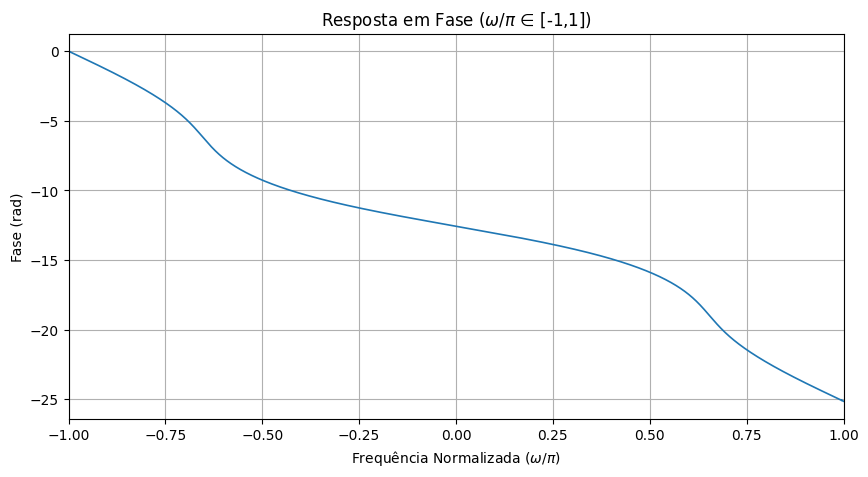

In [792]:
# calcula H em todo o círculo unitário
w, H = freqz(b, a, worN=4096, whole=True)  # w está em [0, 2pi)

# convertendo o eixo de freq para [-pi, pi)
w_signed = w.copy()
w_signed[w > np.pi] -= 2 * np.pi

# ordena por frequência assinada (de -pi a +pi)
idx = np.argsort(w_signed)
w_sorted = w_signed[idx]
H_sorted = H[idx]

# eixo normalizado -1..1
omega_norm = w_sorted / np.pi

# fase contínua (aplica unwrap após ordenar)
fase_unwrap = np.unwrap(np.angle(H_sorted))

# plot da fase no intervalo [-1, 1]
plt.figure(figsize=(10,5))
plt.plot(omega_norm, fase_unwrap, linewidth=1.2)
plt.title(r"Resposta em Fase ($\omega/ \pi$ ∈ [-1,1])")
plt.xlabel(r"Frequência Normalizada ($\omega/ \pi$)")
plt.ylabel("Fase (rad)")
plt.grid(True)
plt.xlim(-1, 1)
plt.show()

#### Explicação

Sim, a fase está conforme esperado, já que a fase do filtro IIR Butterworth não é linear. O filtro butterworth tenta otimizar a magnitude em detrimento a fase. Isso é esperado, porque filtros IIR têm realimentação e, portanto,
_geralmente_ introduzem distorção de fase e atraso de grupo variável.

Por isso, a fase unwrap apresenta um formato curvo e não uma reta,
confirmando que o Butterworth não possui fase linear como os filtros FIR
simétricos.


### Questão 9

Gere o gráfico do atraso de grupo deste sistema (pode usar a função pronta para o
cálculo do atraso de grupo). Não esqueça de colocar as frequências corretas no eixo x.
Explique, em forma de comentário em seu código, se o atraso de grupo está de acordo com
o esperado.

C:\Users\ryyam\AppData\Local\Temp\ipykernel_8888\373019225.py:2: UserWarning: The filter's denominator is extremely small at frequencies [3.117, 3.123, 3.135], around which a singularity may be present
  w_gd, gd = group_delay((b, a))


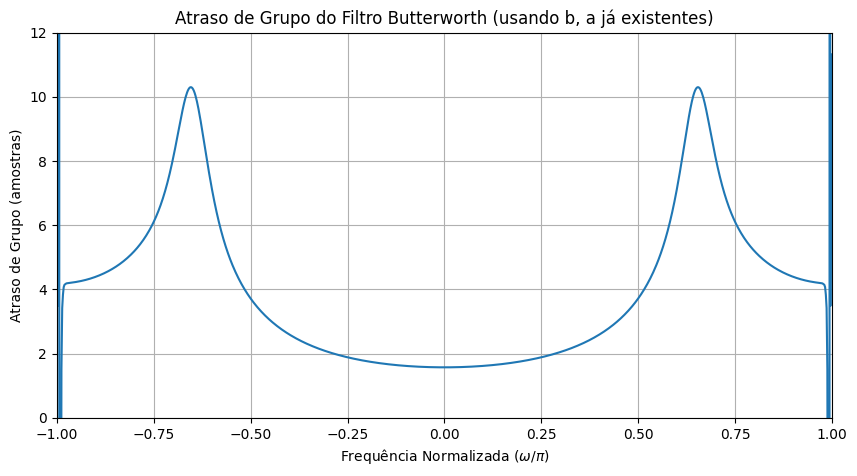

In [793]:
# Calculando o atraso de grupo
w_gd, gd = group_delay((b, a))

# Normalizar eixo omega/pi
omega = w_gd / np.pi

# Criando um eixo simétrico (a func group_delay retorna omega apenas de 0 a pi)
omega_full = np.concatenate((-omega[::-1], omega))
gd_full = np.concatenate((gd[::-1], gd))

# Gráfico do ataso de grupo do filtro butterworth
plt.figure(figsize=(10, 5))
plt.plot(omega_full, gd_full, linewidth=1.5)
plt.title("Atraso de Grupo do Filtro Butterworth (usando b, a já existentes)")
plt.xlabel(r"Frequência Normalizada ($\omega/ \pi$)")
plt.ylabel("Atraso de Grupo (amostras)")
plt.grid(True)
plt.ylim(-0,12)
plt.xlim(-1, 1)
plt.show()


#### Explicação
Sim, o atraso de grupo do filtro Butterworth está como esperado, já que a fase do filtro em questão é não linear, o atraso de grupo não é constante. Existem duas características interessantes nesse gráfico:
-  Na banda passante (de $\omega/\pi \approx -0.5$ até $\omega/\pi \approx 0.5$), o gráfico forma uma curva côncava, Isso significa que as frequências próximas ao centro da banda (baixas frequências) são atrasadas menos do que as frequências mais próximas da borda da banda de corte.
- Atraso de Possui picos de aproximadamente 10 amostras na região de transição ($\omega/\pi \approx \pm 0.65$, próximo à frequência de corte). Este aumento é característico de filtros IIR onde a magnitude está mudando rapidamente (alta seletividade).


OBS: esses picos nas frequências altas são por conta desse warning do python:
UserWarning: The filter's denominator is extremely small at frequencies [3.117, 3.123, 3.135], around which a singularity may be present
  w_gd, gd = group_delay((b, a))

### Questão 10
Filtre o sinal x[n] da Questão 1 usando os coeficientes ak e bk da equação de diferenças
gerados na Questão 7. Gere o gráfico do módulo da Transformada de Fourier da saída
y[n] em dB. Não esqueça de colocar as frequências corretas no eixo x. Explique, em forma
de comentário em seu código, se o módulo da Transformada de Fourier do sinal filtrado está
de acordo com o esperado

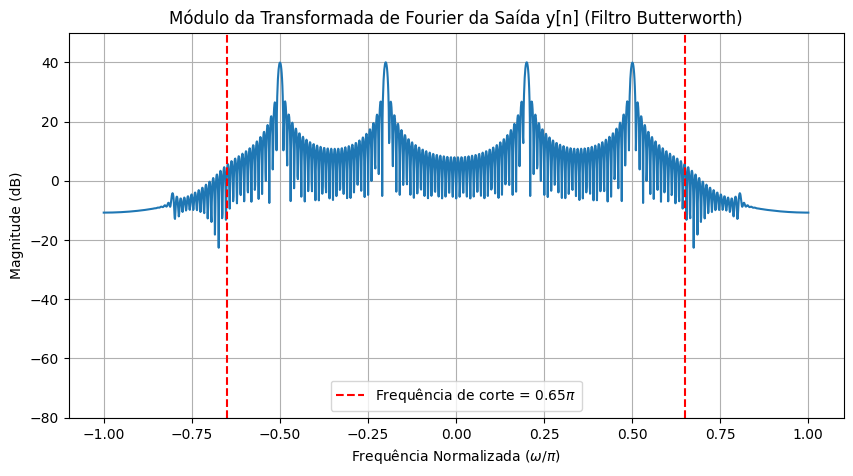

In [794]:
# Filtrando o sinal x[n] com o filtro IIR Butterworth
y_n = lfilter(b, a, x_n)

# FFT da saída
Nfft = 2048  # número de pontos da FFT
Y = np.fft.fft(y_n, Nfft)

# centraliza o zero no vetor (frescura do python)
Y_shift = np.fft.fftshift(Y) 

# Frequência de -pi a pi
omega = np.linspace(-np.pi, np.pi, Nfft)
omega_norm = omega / np.pi

# Magnitude em dB
Y_dB = 20 * np.log10(np.abs(Y_shift) + 1e-12)

# Gráfico do módulo da FFT da saída
plt.figure(figsize=(10,5))
plt.plot(omega_norm, Y_dB, linewidth=1.5)
plt.title("Módulo da Transformada de Fourier da Saída y[n] (Filtro Butterworth)")
plt.xlabel(r"Frequência Normalizada ($\omega/\pi$)")
plt.ylabel("Magnitude (dB)")
plt.grid(True)
plt.ylim(-80, 50)

# Frequência de corte do filtro
plt.axvline(wc_norm, color='r', linestyle='--', label=r"Frequência de corte = $0.65\pi$")
plt.axvline(-wc_norm, color='r', linestyle='--')
plt.legend()
plt.show()


#### Explicação

Sim, o resultado do filtro foi como esperado. As frequências $0.2\pi$ e $0.5 \pi$ foram mantidas por estarem dentro da banda passante do filtro (perceptível pelos picos nesses valores de frequências, ou seja, alto ganho) e a componente de frequência $0.8 \pi$ foi brutalmente atenuada (o pico nessa frequência sumiu completamente).

 Diferente do filtro FIR com janelamento, o filtro butterworth não apresentou os lóbulos laterais depois da frequência de corte, realmente a atenuação foi mais linear (monotonicamente decrescente).

### Questão 11
Novamente, o sinal de saída y[n] deve ser, de forma aproximada, igual a um sinal g[n]
que corresponde à soma de dois cossenos com frequências angulares igual a 0,2π e 0,5π,
mas com um atraso. Entretanto, desta vez, o atraso do sinal g[n] não pode ser determinado
a priori. Este atraso deve ser estimado a partir do atraso de grupo. Para saber se isto
realmente está acontecendo, gere, em um mesmo gráfico, os sinais g[n-nd] e y[n], em
que nd é um atraso que você deve estimar a partir do atraso de grupo. Comente se estes
sinais são parecidos e sincronizados.

Atraso estimado a partir do atraso de grupo: nd = 2 amostras


C:\Users\ryyam\AppData\Local\Temp\ipykernel_8888\166029100.py:5: UserWarning: The filter's denominator is extremely small at frequencies [3.117, 3.123, 3.135], around which a singularity may be present
  w_gd, gd = group_delay((b, a))


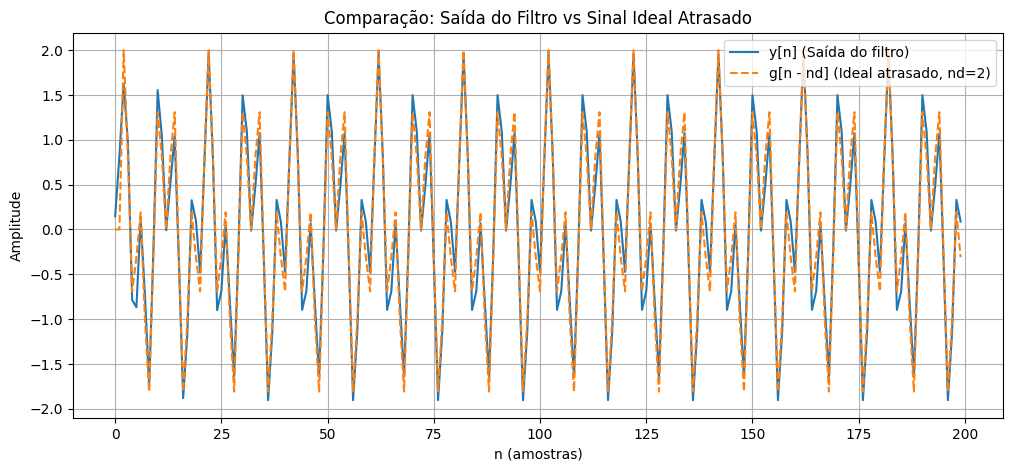

In [795]:
# Sinal x_n já filtrado da questao 10
y_n 

# Estimando o atraso de grupo
w_gd, gd = group_delay((b, a))

# média do atraso de grupo na banda passante (primeiros 40% das amostras),
# regiao aproximadamente linear do filtro
nd = int(np.round(np.mean(gd[:int(len(gd)*0.4)])))  

print(f"Atraso estimado a partir do atraso de grupo: nd = {nd} amostras")

# Gerando o sinal g[n] com 2 cossenos (0.2pi e 0.5pi)
N = len(y_n)
n_y = np.arange(N)

g_ideal = np.cos(0.2 * np.pi * n_y) + np.cos(0.5 * np.pi * n_y)

# Atrasando g[n] pelo atraso de grupo estimado nd
g_shifted = np.roll(g_ideal, nd)

# Retirando a ciclicidade do sinal (transiente)
g_shifted[:nd] = 0 

# Plotando os sinais
plt.figure(figsize=(12,5))
plt.plot(n_y, y_n, label="y[n] (Saída do filtro)", linewidth=1.5)
plt.plot(n_y, g_shifted, '--', label=f"g[n - nd] (Ideal atrasado, nd={nd})", linewidth=1.5)
plt.title("Comparação: Saída do Filtro vs Sinal Ideal Atrasado")
plt.xlabel("n (amostras)")
plt.ylabel("Amplitude")
plt.grid(True)
plt.legend()
plt.show()

#### Explicação
Sim, após a região de transiente (quando o filtro ainda está se ajustando a entrada), isto é, após aproximadamente 2 amostras (justamente o atraso de grupo aproximado na região de passagem), os dois sinais ficam bem parecidos e alinhados. Eu descobri esse atraso de grupo aproximado considerando o atraso de grupo apenas na região de passagem, já que o sinal filtrado só tem componentes nessa região, fazendo com que seu atraso de grupo seja o mesmo desse intervalo de frequências (veja o gráfico do atraso de grupo e entenderá).

Apesar disso, é possivel notar que alinhamento não é perfeito ao longo de todo o sinal. É possível notar pequenas discrepâncias de fase, principalmente nas componentes de maior frequência (como $0.5\pi$). Essa falta de sincronização perfeita ocorre devido a nossa aproximação $n_d = 2$ e isso é uma evidência visual da distorção de fase introduzida pelo filtro Butterworth IIR. Como o Atraso de Grupo não é constante, ele atrasa o componente $0.2\pi$ por uma quantidade (próxima a 2 amostras) e o componente $0.5\pi$ por uma quantidade ligeiramente diferente (próxima a 3-4 amostras), o que leva a uma alteração na forma da onda (distorção) e, consequentemente, à sincronização imperfeita com o sinal ideal.

## Parte 3

### Questão 12
Projete um filtro passa-baixa FIR usando o Método do Janelamento com as seguintes
especificações: wp = 0,6π, ws = 0,7π, ẟ1 = 0,01 e ẟ2 = 0,05. Para a completa especificação
do filtro, você deve dizer os valores de: Janela usada (retangular, Bartlett, Hanning,
Hamming ou Nlackman), ordem do filtro (M), frequência de corte (wc) e atraso do filtro ideal
(ɑ). Para esta questão, usa a tabela que se encontra nos slides da disciplina. Coloque a
resposta em forma de comentário no código.

In [796]:
# Especificações do filtro
omega_p = 0.6 * np.pi    # Frequência de passagem
omega_s = 0.7 * np.pi    # Frequência de rejeição
delta_1 = 0.01           # Ripple na banda de passagem
delta_2 = 0.05           # Ripple na banda de rejeição

# Atenuação mínima exigida
A_min = -20 * np.log10(np.min([delta_1, delta_2]))

# Largura da banda de transição
Delta_omega = omega_s - omega_p

# Ordem do filtro para janela Hamming

# A Janela Hamming (41 dB) é usada pois garante a atenuação de 40 dB.
M = int(np.ceil((3.3 * np.pi) / Delta_omega))

# Garantindo que M seja ímpar (fase linear centrada)
if M % 2 == 0:
    M += 1

# Frequência de corte
omega_c = (omega_p + omega_s) / 2

# Atraso de grupo
alpha = M / 2

# Exibir resultados
print("===== Resultados do Projeto com Janela Hamming =====")
print(f"Atenuação mínima exigida: {A_min:.4f} dB")
print(f"Largura da transição Δω: {Delta_omega:.4f} rad")
print(f"Ordem do filtro (M): {M}")
print(f"Frequência de corte ωc: {omega_c:.4f} rad")
print(f"Atraso de grupo α: {alpha} amostras")

===== Resultados do Projeto com Janela Hamming =====
Atenuação mínima exigida: 40.0000 dB
Largura da transição Δω: 0.3142 rad
Ordem do filtro (M): 33
Frequência de corte ωc: 2.0420 rad
Atraso de grupo α: 16.5 amostras


#### Resposta

##### 1. Especificações
- Frequência de Passagem: $\omega_p = 0.6\pi$
- Frequência de Rejeição: $\omega_s = 0.7\pi$
- Ripple na banda de Passagem: $\delta_1 = 0.01$
- Ripple na banda de Rejeição: $\delta_2 = 0.05$

##### 2. Determinação da Janela

Atenuação Mínima ($\mathbf{A_{\min}}$) exigida, seguindo a regra do professor:
$$A_{\text{min}} = -20 \log_{10}(\min(0.01, 0.05)) = -20 \log_{10}(0.01) = \mathbf{40.0000 \text{ dB}}$$

A **Janela Hamming** é escolhida pois oferece $41 \text{ dB}$ de atenuação, sendo a janela mais simples que garante $40 \text{ dB}$.

##### 3. Cálculo da Ordem do Filtro (M)
Largura da Banda de Transição ($\Delta\omega$):
$$\Delta\omega = \omega_s - \omega_p = 0.1\pi \approx \mathbf{0.3142 \text{ rad}}$$

Para a Janela Hamming, a largura de transição é $\mathbf{3.3\pi / M}$:
$$M \approx \frac{3.3\pi}{\Delta\omega} = \frac{3.3\pi}{0.1\pi} = 33$$
**Ordem do Filtro:** $M = \mathbf{33}$

##### 5. Frequência de corte do filtro

A frequência de corte $\omega_c$ pelo método do janelamento é dada por: 
$$\omega_c = \frac{\omega_p + \omega_s}{2} = \frac{0.6\pi + 0.7\pi}{2}$$

ou seja, $\omega_c = 0.65\pi \approx \mathbf{2.0420 \text{ rad}}$

##### 6. Atraso de grupo do filtro ($\alpha$)
O atraso de grupo de um filtro ideal é dado por: $$\alpha = \frac{M}{2}$$

Como a ordem determinada foi $M = 33$:$$\alpha = \frac{33}{2} = \mathbf{16.5 \text{ amostras}}$$

##### 7. Especificação dos parâmetros
1. Parâmetros da questão:
- Frequência de Passagem ($\omega_p$) -> $0.6\pi$

- Frequência de Rejeição ($\omega_s$) -> $0.7\pi$

- Ripple na Passagem ($\delta_1$) -> $0.01$

- Ripple na Rejeição ($\delta_2$) -> $0.05$

2. Parâmetros especificados por mim
- Janela Usada: **Hamming**
- Atenuação Mínima Exigida ($A_{\text{min}}$): $\mathbf{40.0000 \text{ dB}}$ 
- Largura da Banda de Transição ($\Delta\omega$): $\mathbf{0.3142 \text{ rad}}$
- Ordem do Filtro ($M$): $\mathbf{33}$
- Frequência de Corte de Projeto ($\omega_c$): $\mathbf{2.0420 \text{ rad}}$
- Atraso do Filtro Ideal ($\alpha$): $\mathbf{16.5}$ amostras


OBS: Na internet diz para calcular $A_{\text{min}}$ considerando apenas o $\delta_2$, mas no seu slide você manda calcular utilizando o menor valor entre os dois. Fazendo como você pede no slide, $A_{\text{min}} = 40 dB$, mas fazendo como a internet diz, $A_{\text{min}} = 26 dB$. Calculei da forma que seu slide diz porquê você que dá a nota rsrsrs.

### Questao 13
Repita a Questão 12 usando Janela de Kaiser. Para a completa especificação do filtro,
você deve dizer os valores de: parâmetro β, ordem do filtro (M), frequência de corte (wc) e
atraso do filtro ideal (ɑ). Para esta questão, use as fórmulas que se encontram nos slides da
disciplina. Coloque a resposta em forma de comentário no código.

In [797]:
import numpy as np

# Especificações do filtro
omega_p = 0.6 * np.pi  # Frequência de passagem
omega_s = 0.7 * np.pi  # Frequência de rejeição
delta_1 = 0.01         # Ripple na banda de passagem
delta_2 = 0.05         # Ripple na banda de rejeição

# Atenuação mínima exigida (A_min)
delta_min = np.min([delta_1, delta_2])
A_min_dB = -20 * np.log10(delta_min)
A = A_min_dB

# Cálculo do parametro beta
if A < 21:
    beta = 0.0
elif 21 <= A <= 50:
    beta = 0.5842 * (A - 21) ** 0.4 + 0.07886 * (A - 21)
else: # A > 50
    beta = 0.1102 * (A - 8.7)

# Cálculo da ordem do filtro (M)

# Largura da Banda de Transição (delta omega)
Delta_omega = omega_s - omega_p

# Fórmula da ordem M
M_float = (A - 8) / (2.285 * Delta_omega)
M = int(np.ceil(M_float))

# Garantindo que M seja ímpar
if M % 2 == 0:
    M += 1

# Frequência de corte
omega_c = (omega_p + omega_s) / 2

# Atraso de grupo
alpha = M / 2

# Exibindo resultados
print("===== Resultados do Projeto FIR com Janela de Kaiser (Fórmulas do Slide) =====")
print(f"1. Atenuação Mínima (A_min): {A_min_dB:.4f} dB")
print(f"2. Parâmetro Beta (β): {beta:.4f}")
print(f"3. Largura da Transição (Δω): {Delta_omega:.4f} rad")
print(f"4. Fator (A-8)/(2.285*Δω): {M_float:.4f}")
print(f"5. Ordem do Filtro (M): {M}")
print(f"6. Frequência de Corte (ωc): {omega_c:.4f} rad (ou {omega_c/np.pi:.2f}π)")
print(f"7. Atraso de Grupo (α): {alpha} amostras")

===== Resultados do Projeto FIR com Janela de Kaiser (Fórmulas do Slide) =====
1. Atenuação Mínima (A_min): 40.0000 dB
2. Parâmetro Beta (β): 3.3953
3. Largura da Transição (Δω): 0.3142 rad
4. Fator (A-8)/(2.285*Δω): 44.5773
5. Ordem do Filtro (M): 45
6. Frequência de Corte (ωc): 2.0420 rad (ou 0.65π)
7. Atraso de Grupo (α): 22.5 amostras


#### Resposta

##### 1. Especificações
- Frequência de Passagem: $\omega_p = 0.6\pi$
- Frequência de Rejeição: $\omega_s = 0.7\pi$
- Ripple na banda de Passagem: $\delta_1 = 0.01$
- Ripple na banda de Rejeição: $\delta_2 = 0.05$

##### 2. Determinação da Atenuação Mínima e Parâmetro $\beta$

Atenuação Mínima ($\mathbf{A_{\min}}$) exigida (usando $\min(\delta_1, \delta_2)=0.01$):
$$A_{\text{min}} = -20 \log_{10}(\min(0.01, 0.05)) = -20 \log_{10}(0.01) = \mathbf{40.00 \text{ dB}}$$

Para a Janela de Kaiser, usando $A = 40.00 \text{ dB}$ (Fórmula para $20 < A < 50$):
$$\beta = 0.5842 (A - 21) ^{0.4} + 0.07886 (A - 21)$$
Substituindo $A = 40.00 \text{ dB}$:
$$\beta \approx 0.5842 (40.00 - 21) ^{0.4} + 0.07886 (40.00 - 21)$$
$$\beta \approx 0.5842 (19) ^{0.4} + 0.07886 (19) \approx 3.3953$$
**Parâmetro $\beta$: $\mathbf{3.3953}$**

##### 3. Cálculo da Ordem do Filtro (M)
Largura da Banda de Transição ($\Delta\omega$):
$$\Delta\omega = \omega_s - \omega_p = 0.7\pi - 0.6\pi = 0.1\pi \approx \mathbf{0.3142 \text{ rad}}$$

O Fator de Design $D$ (Fórmula para $A > 21 \text{ dB}$):
$$D \approx \frac{A - 7.95}{14.36}$$
Substituindo $A = 40.00 \text{ dB}$:
$$D \approx \frac{40.00 - 7.95}{14.36} \approx \mathbf{2.2319}$$

A ordem do filtro ($M$) é determinada por:
$$M \approx \frac{D \cdot 2\pi}{\Delta\omega}$$
$$M \approx \frac{2.2319 \cdot 2\pi}{0.1\pi} \approx 44.638$$

Arredondando para o inteiro ímpar mais próximo para manter a Fase Linear:
**Ordem do Filtro:** $M = \mathbf{45}$



##### 5. Frequência de corte do filtro

A frequência de corte $\omega_c$ pelo método do janelamento é dada por: 
$$\omega_c = \frac{\omega_p + \omega_s}{2} = \frac{0.6\pi + 0.7\pi}{2}$$

ou seja, $\omega_c = 0.65\pi \approx \mathbf{2.0420 \text{ rad}}$



##### 6. Atraso de grupo do filtro ($\alpha$)
O atraso de grupo de um filtro ideal é dado por: $$\alpha = \frac{M}{2}$$

Como a ordem determinada foi $M = 45$:$$\alpha = \frac{45}{2} = \mathbf{22.5 \text{ amostras}}$$


##### 7. Especificação dos parâmetros
1. Parâmetros da questão:
- Frequência de Passagem ($\omega_p$) -> $0.6\pi$
- Frequência de Rejeição ($\omega_s$) -> $0.7\pi$
- Ripple na Passagem ($\delta_1$) -> $0.01$
- Ripple na Rejeição ($\delta_2$) -> $0.05$

2. Parâmetros especificados:
- Janela Usada: Kaiser
- Parâmetro $\beta$: $\mathbf{3.3953}$
- Atenuação Mínima Exigida ($A_{\text{min}}$): $\mathbf{40.00 \text{ dB}}$
- Largura da Banda de Transição ($\Delta\omega$): $\mathbf{0.3142 \text{ rad}}$ ($0.1\pi$)
- Ordem do Filtro ($M$): $\mathbf{45}$
- Frequência de Corte de Projeto ($\omega_c$): $\mathbf{2.0420 \text{ rad}}$ ($0.65\pi$)
- Atraso do Filtro Ideal ($\alpha$): $\mathbf{22.5}$ amostras

### Questão 14
Gere o gráfico do módulo da Resposta em Frequência deste filtro em dB (ou seja,
da Transformada de Fourier da resposta ao impulso h[n]). Não esqueça de colocar as
frequências corretas no eixo x. Explique, em forma de comentário em seu código, se a
módulo de Resposta em Frequência está de acordo com o esperado.

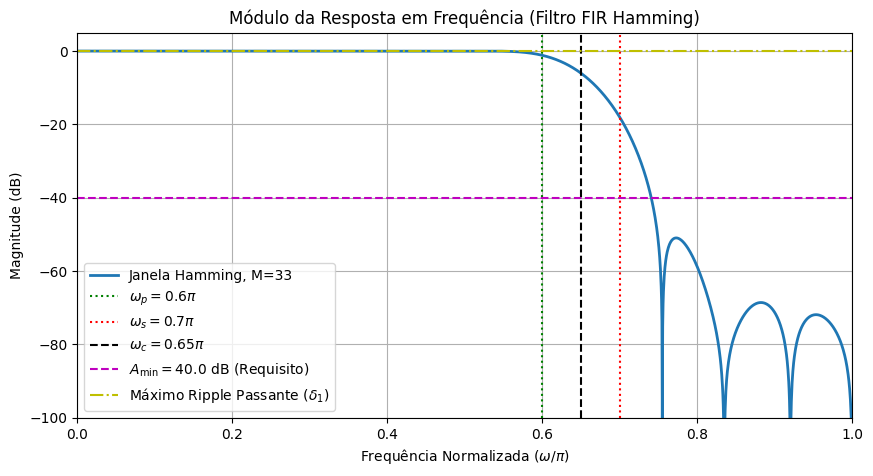

In [798]:
# Parâmetros de Projeto (Filtro Hamming - O de menor ordem que atende 40 dB)
M = 33              # Ordem do filtro
wc_norm = 0.65      # Frequência de corte (wc/pi)
A_min_req = 40.00   # Atenuação Mínima Requerida (dB)
A_hamming = 41.00   # Atenuação garantida pela Janela Hamming

# Gerando os Coeficientes h[n]
# O número de taps é M+1 = 34.
h_n = firwin(numtaps=M + 1, cutoff=wc_norm, window='hamming', pass_zero='lowpass')

# Cálculando a Resposta em Frequência H(e^jw)
w, H = freqz(h_n, 1, worN=2048)

# Normalizando o eixo de frequências
omega_norm = w / np.pi

# Convertendo magnitude para dB
H_dB = 20 * np.log10(np.abs(H) + 1e-12)

# Gráfico do filtro Hamming
plt.figure(figsize=(10, 5))
plt.plot(omega_norm, H_dB, linewidth=2, label=f'Janela Hamming, M={M}')
plt.title("Módulo da Resposta em Frequência (Filtro FIR Hamming)")
plt.xlabel(r"Frequência Normalizada ($\omega/\pi$)")
plt.ylabel("Magnitude (dB)")

# Frequências de projeto
plt.axvline(0.6, color='g', linestyle=':', label=r"$\omega_p = 0.6\pi$")
plt.axvline(0.7, color='r', linestyle=':', label=r"$\omega_s = 0.7\pi$")
plt.axvline(wc_norm, color='k', linestyle='--', label=r"$\omega_c = 0.65\pi$")
plt.axhline(-A_min_req, color='m', linestyle='--', label=r"$A_{\min} = 40.0 \text{ dB}$ (Requisito)")

# Visualização de Ripple (0.01) -> -20*log10(1-0.01) ~= 0.087 dB (max ripple negativo)
plt.axhline(-0.087, color='y', linestyle='-.', label=r"Máximo Ripple Passante ($\delta_1$)")

plt.ylim(-100, 5) 
plt.xlim(0, 1) 
plt.legend()
plt.grid(True)
plt.show()

#### Resposta

O filtro cumpre as especificações de forma geral (Passa-Baixa, Ripple na Banda Passante e Fase Linear), mas falha no requisito da **Atenuação Mínima** ($\mathbf{A_{\min}}$) na frequência de rejeição ($\omega_s$).

1. Características corretas do filtro

* A linha azul está centrada em $\omega_c = 0.65\pi$ e atenua o sinal após a banda de passagem ($\omega_p = 0.6\pi$), confirmando a função passa-baixa.
* O ripple na banda de passagem ($\omega < 0.6\pi$) é muito pequeno e mantido sempre abaixo do limite estabelecido por $\delta_1 = 0.01$ (linha amarela), conforme a característica da Janela Hamming.
* O projeto FIR com ordem ímpar ($M=33$) garante que a resposta em fase seja linear, resultando em um atraso de grupo constante de $\alpha = 16.5$ amostras.



2. Falha na Atenuação Mínima ($A_{\min}$)

* A atenuação mínima exigida é $\mathbf{A_{\min} = 40.0 \text{ dB}}$ (calculado a partir de $\min(\delta_1, \delta_2)=0.01$). Isso significa que o módulo deve estar abaixo de $-40.0 \text{ dB}$ a partir de $\omega_s = 0.7\pi$. Mas isso não acontece, porque no ponto exato da frequência de rejeição ($\omega_s = 0.7\pi$, linha vermelha pontilhada), a curva de resposta (linha azul) ainda está acima da linha de $-40.0 \text{ dB}$ (está próxima de $-30 \text{ dB}$). A atenuação de $-40.0 \text{ dB}$ só é alcançada um pouco depois de $0.7\pi$.

A falha decorre da porque o método do janelamento é aproximado.
A ordem ${M=33}$ foi calculada usando a fórmula de aproximação $M \approx 3.3\pi / \Delta\omega$. A aproximação resultou em uma banda de transição que não foi estreita o suficiente para forçar a curva a atingir $40 \text{ dB}$ exatamente em $\omega_s$. Isso ocorre porque a queda de -40 dB está muito próxima do limite da janela de Hamming.

Para não falhar, a ordem $M$ deveria ser aproximadamente 60 (valor obtido com testes).

### Questão 15
Gere o gráfico da resposta em fase deste sistema (com fase contínua, usando
unwrap. Não esqueça de colocar as frequências corretas no eixo x. Explique, em forma de
comentário em seu código, se a fase da Resposta em Frequência está de acordo com o
esperado.

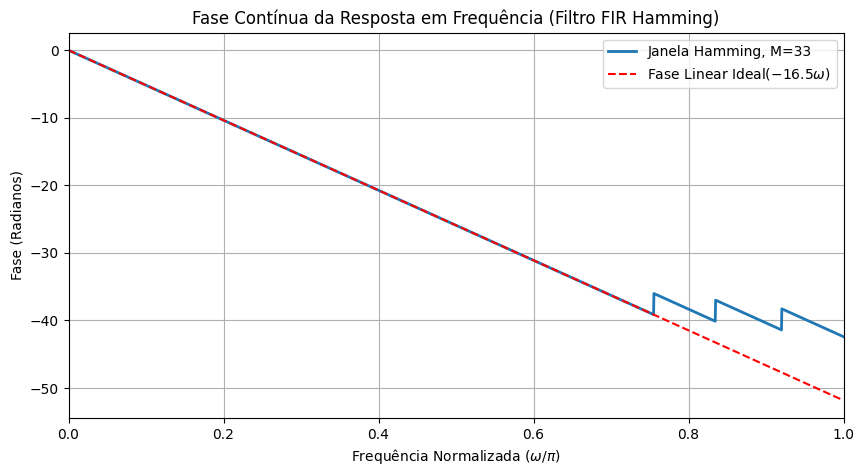

In [799]:
# Cálculo da Fase e Desembrulhamento (unwrap)
H_phase_rad = np.unwrap(np.angle(H))

# Cálculo da Fase Linear Ideal (para comparação)
# Atraso de Grupo teórico (alpha)
alpha = M / 2 
# Fase Ideal: -alpha * w (w está em radianos)
fase_ideal = -alpha * w 

# Gráfico da Fase Contínua
plt.figure(figsize=(10, 5))
plt.plot(omega_norm, H_phase_rad, linewidth=2, label=f'Janela Hamming, M={M}')
plt.plot(omega_norm, fase_ideal, 'r--', label=r'Fase Linear Ideal($-16.5\omega$)')

plt.title("Fase Contínua da Resposta em Frequência (Filtro FIR Hamming)")
plt.xlabel(r"Frequência Normalizada ($\omega/\pi$)")
plt.ylabel("Fase (Radianos)")

plt.xlim(0, 1) 
plt.legend()
plt.grid(True)
plt.show()


#### Resposta
Sim, o resultado está conforme o esperado:

- A fase do sinal é linear dentro da banda de passagem ($\omega < \omega_p$), assim como esperado para filtros FIR (sem distorção de fase nessa região).
- Os desvios da reta ocorrem na banda de rejeição (após $\omega_s$), mas isso é irrelevante, pois o sinal já foi atenuado em $40 \text{ dB}$.

### Questão 16
Gere o gráfico do atraso de grupo deste sistema (pode usar a função pronta para o
cálculo do atraso de grupo). Não esqueça de colocar as frequências corretas no eixo x.
Explique, em forma de comentário em seu código, se o atraso de grupo está de acordo com
o esperado.

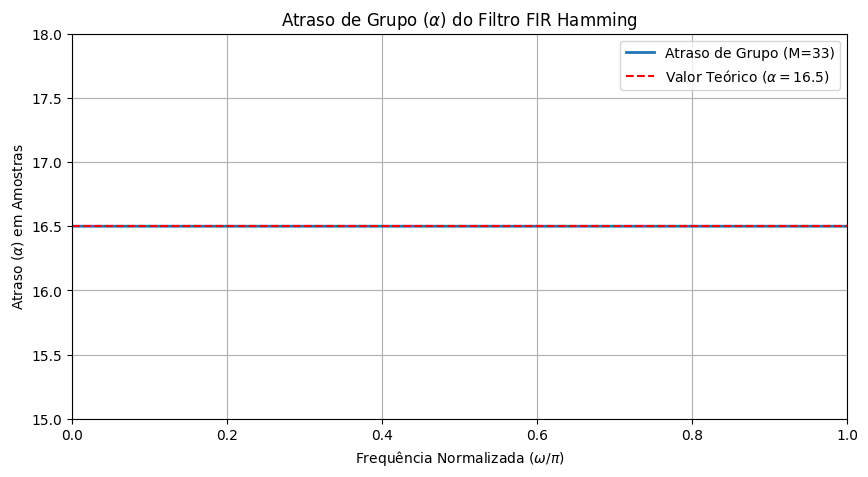

In [800]:
# Cálculando o atraso de grupo
w_gd, gd = group_delay((h_n, 1), w=2048)

# Normalizando o eixo de frequências
omega_norm_gd = w_gd / np.pi

# Gráfico do Atraso de Grupo
plt.figure(figsize=(10, 5))
plt.plot(omega_norm_gd, gd, linewidth=2, label=f'Atraso de Grupo (M={M})')
plt.title(r"Atraso de Grupo ($\alpha$) do Filtro FIR Hamming")
plt.xlabel(r"Frequência Normalizada ($\omega/\pi$)")
plt.ylabel(r"Atraso ($\alpha$) em Amostras")

# Linha de referência do atraso teórico
alpha_teorico = M / 2
plt.axhline(alpha_teorico, color='r', linestyle='--', label=f'Valor Teórico ($\\alpha = {alpha_teorico:.1f}$)')

plt.xlim(0, 1) 
plt.ylim(15, 18) 
plt.legend()
plt.grid(True)
plt.show()

#### Resposta
Sim, o atraso de grupo está conforme o esperado, já que é constante com valor 16.5 ($M = 33 \Rightarrow \alpha = 33/2 =  16.5 $), garantindo que todas as componentes de frequência dentro da banda de passagem sofrem o mesmo atraso de tempo, evitando distorção temporal (ou de fase) no sinal processado..Isso é justamente o que se espera de um filtro IIR com janelamento.

### Questão 17
Filtre o sinal x[n] da questão 1 usando a resposta ao impulso projetada usando o
método do Janelamento. Gere o gráfico do módulo da Transformada de Fourier da
saída y[n] em dB. Não esqueça de colocar as frequências corretas no eixo x. Explique, em
forma de comentário em seu código, se o módulo da Transformada de Fourier do sinal
filtrado está de acordo com o esperado.

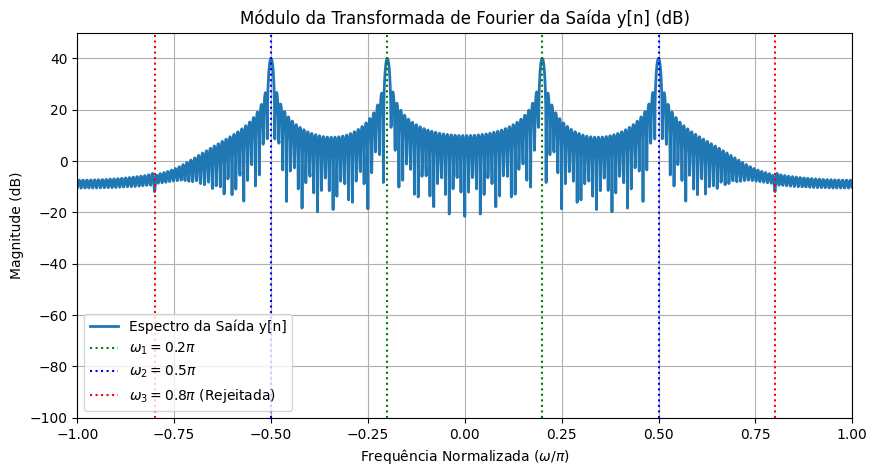

In [801]:
# Filtragem: Convolução y[n] = x[n] * h[n]
y_n = np.convolve(x_n, h_n, mode="same")

# Cálculo da transformada de Fourier (FFT) da Saída y[n]

# Tamanho da FFT para melhor resolução de frequência
N_FFT = 2048 
Y_f = np.fft.fft(y_n, N_FFT)

# Reordenando para ficar simétrico (frescura do python)
Y_shift = np.fft.fftshift(Y_f)

# Eixo de frequências simétrico: [-pi, pi]
omega = np.linspace(-np.pi, np.pi, N_FFT, endpoint=False) 
omega_norm = omega / np.pi

# Módulo em dB
Y_dB = 20 * np.log10(np.abs(Y_shift) + 1e-12)

# Gráfico do Módulo da Transformada de Fourier da Saída y[n]
plt.figure(figsize=(10, 5))
plt.plot(omega_norm, Y_dB, linewidth=2, label='Espectro da Saída y[n]')
plt.title("Módulo da Transformada de Fourier da Saída y[n] (dB)")
plt.xlabel(r"Frequência Normalizada ($\omega/\pi$)")
plt.ylabel("Magnitude (dB)")

# Linhas de referência das frequências originais
plt.axvline(0.2, color='g', linestyle=':', label=r"$\omega_1 = 0.2\pi$")
plt.axvline(0.5, color='b', linestyle=':', label=r"$\omega_2 = 0.5\pi$")
plt.axvline(0.8, color='r', linestyle=':', label=r"$\omega_3 = 0.8\pi$ (Rejeitada)")

# Linhas de referência simétricas
plt.axvline(-0.2, color='g', linestyle=':')
plt.axvline(-0.5, color='b', linestyle=':')
plt.axvline(-0.8, color='r', linestyle=':')

plt.xlim(-1, 1) 
plt.ylim(-100, 50) 
plt.legend()
plt.grid(True)
plt.show()

#### Resposta
Sim, o resultado do filtro FIR Janelamento Hamming foi como esperado. As frequências $\mathbf{0.3\pi}$ e $\mathbf{0.5\pi}$ foram mantidas por estarem dentro da banda passante do filtro (perceptível pelos picos estreitos nesses valores de frequências, ou seja, alto ganho). A componente de frequência $\mathbf{0.8\pi}$ foi brutalmente atenuada (o pico nessa frequência sumiu no gráfico), pois estava na banda de rejeição do filtro.

O projeto utilizou o Método do Janelamento com a Janela Hamming para obter o $\mathbf{h[n]}$, mas não garantiu a atenuação mínima de $\mathbf{40 \text{ dB}}$ na banda de rejeição. Entretanto, como 0.8 é um valor de frequência distante o suficiente da frequência da banda de rejeição, o pico em $\mathbf{0.8\pi}$ foi atenuado pelo filtro, caindo para menos de $\mathbf{-40.0 \text{ dB}}$, cumprindo o requisito de projeto.


### Questão 18
O sinal de saída y[n] deve ser, de forma aproximada, igual a um sinal g[n] que
corresponde à soma de dois cossenos com frequências angulares igual a 0,2π e 0,5π, mas
com um atraso igual a α. Para saber se isto realmente está acontecendo, gere, em um
mesmo gráfico, os sinais g[n-α] e y[n], e comente se estes sinais são parecidos e
sincronizados

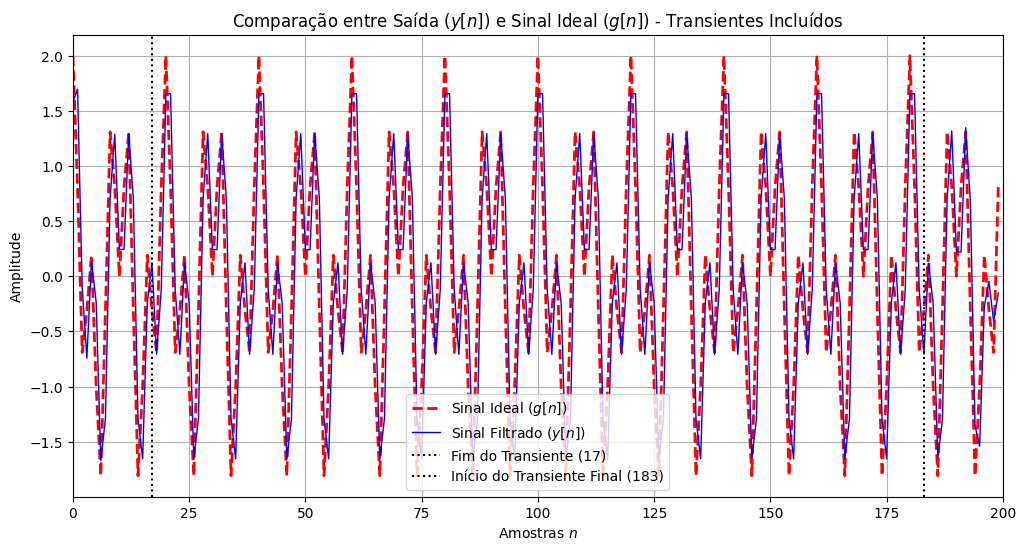

In [807]:
# Número de amostras
N = 200             
n = np.arange(N)

# Atraso teórico: 16.5
alpha = M / 2       

# Gerando o Sinal Ideal g[n]
g_n = np.cos(0.2 * np.pi * n) + np.cos(0.5 * np.pi * n)

# Plotagem dos Sinais
plt.figure(figsize=(12, 6))

# Plotando o sinal ideal (g[n])
plt.plot(n, g_n, 'r--', linewidth=2, label=r'Sinal Ideal ($g[n]$)')

# Plotando o sinal filtrado (y[n]).
plt.plot(n, y_n, 'b', linewidth=1, label=r'Sinal Filtrado ($y[n]$)') 

# Linha vertical indicando o fim do transiente (início da região estável)
alpha_int = int(np.ceil(alpha))
plt.axvline(alpha_int, color='k', linestyle=':', label=f"Fim do Transiente ({alpha_int})")
plt.axvline(N - alpha_int, color='k', linestyle=':', label=f"Início do Transiente Final ({N - alpha_int})")

plt.title(f"Comparação entre Saída ($y[n]$) e Sinal Ideal ($g[n]$) - Transientes Incluídos")
plt.xlabel("Amostras $n$")
plt.ylabel("Amplitude")
plt.xlim(0, N) 
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
import numpy as np

# Especificações do filtro
omega_p = 0.6 * np.pi  # Frequência de passagem
omega_s = 0.7 * np.pi  # Frequência de rejeição
delta_1 = 0.01         # Ripple na banda de passagem
delta_2 = 0.05         # Ripple na banda de rejeição

# Atenuação mínima exigida (A_min)
delta_min = np.min([delta_1, delta_2])
A_min_dB = -20 * np.log10(delta_min)
A = A_min_dB

# Cálculo do parametro beta
if A < 21:
    beta = 0.0
elif 21 <= A <= 50:
    beta = 0.5842 * (A - 21) ** 0.4 + 0.07886 * (A - 21)
else: # A > 50
    beta = 0.1102 * (A - 8.7)

# Cálculo da ordem do filtro (M)

# Largura da Banda de Transição (delta omega)
Delta_omega = omega_s - omega_p

# Fórmula da ordem M
M_float = (A - 8) / (2.285 * Delta_omega)
M = int(np.ceil(M_float))

# Garantindo que M seja ímpar
if M % 2 == 0:
    M += 1

# Frequência de corte
omega_c = (omega_p + omega_s) / 2

# Atraso de grupo
alpha = M / 2

# Exibindo resultados
print("===== Resultados do Projeto FIR com Janela de Kaiser (Fórmulas do Slide) =====")
print(f"1. Atenuação Mínima (A_min): {A_min_dB:.4f} dB")
print(f"2. Parâmetro Beta (β): {beta:.4f}")
print(f"3. Largura da Transição (Δω): {Delta_omega:.4f} rad")
print(f"4. Fator (A-8)/(2.285*Δω): {M_float:.4f}")
print(f"5. Ordem do Filtro (M): {M}")
print(f"6. Frequência de Corte (ωc): {omega_c:.4f} rad (ou {omega_c/np.pi:.2f}π)")
print(f"7. Atraso de Grupo (α): {alpha} amostras")

===== Resultados do Projeto FIR com Janela de Kaiser (Fórmulas do Slide) =====
1. Atenuação Mínima (A_min): 40.0000 dB
2. Parâmetro Beta (β): 3.3953
3. Largura da Transição (Δω): 0.3142 rad
4. Fator (A-8)/(2.285*Δω): 44.5773
5. Ordem do Filtro (M): 45
6. Frequência de Corte (ωc): 2.0420 rad (ou 0.65π)
7. Atraso de Grupo (α): 22.5 amostras


#### Resposta
Sim, a resposta foi bem próxima da esperada. O gráfico do sinal filtrado (sem a componente $0.8 \pi$) ficou com o formato muito parecido com o sinal $g[n]$, evidenciando que a frequência alta foi devidamente filtrada. Além disso, os sinais estão relativamente sincronizados, porém há um pequeno erro de sincronia notável que é decorrente do atraso de grupo fracionário ($\alpha = 16.5$). 

Nas últimas amostras os dois sinais ficam bem diferentes, mas é devido a região de transiente.

### Questão 19
Descreva, em forma de comentário no código, quais as vantagens e desvantagens
dos filtros das Partes 1, 2 e 3 a partir dos gráficos gerados e da teoria vista em sala de
aula.

#### Resposta

##### Parte 1: Filtro FIR com Janelamento Retangular

* Vantagens:
    * Banda de Transição: É a janela que oferece a banda de transição mais estreita para uma dada ordem M.
    * Fase: Possui Fase Linear perfeita (FIR) dentro da banda de passagem, garantindo Atraso de Grupo ($\alpha$) constante.
* Desvantagens:
    * Ripple e Lóbulos: Possui o maior lobo lateral principal (aprox. -13 dB), resultando na pior atenuação da banda de rejeição, o que geralmente inviabiliza o cumprimento de requisitos rigorosos de atenuação.
    * Vazamento Espectral: Apresenta maior vazamento de energia do lobo principal para os lóbulos laterais.

##### Parte 2: Filtro Butterworth (IIR)

* Vantagens:
    * Eficiência em Ordem: Alcança requisitos de atenuação com uma ordem muito menor (M) em comparação com filtros FIR.
    * Banda de Rejeição: Possui atenuação monotonicamente decrescente (sem lóbulos laterais), resultando em uma resposta suave na banda de rejeição.
    * Ripple: É um filtro maximamente plano, apresentando o menor ripple possível na banda de passagem.
* Desvantagens:
    * Fase: Possui Fase Não-Linear (Atraso de Grupo não constante) na banda de passagem.
    * Distinção de Fase: A fase não-linear causa distorção temporal no sinal de saída (o atraso das frequências não é o mesmo).


##### Parte 3: Filtro FIR com Janelamento Hamming

* Vantagens:
    * Fase: Possui Fase Linear perfeita (Atraso de Grupo α constante e igual a M/2), o que garante que o sinal filtrado não sofrerá distorção temporal.
    **Atenuação: Oferece excelente atenuação lateral ($\mathbf{A_{\min} \approx 41 \text{ dB}}$), permitindo o cumprimento de requisitos rigorosos de banda de rejeição.
    * Atenuação de Lóbulos: Os lóbulos laterais são significativamente menores que os da Janela Retangular.
* Desvantagens:
    * Ordem (M): Exige uma ordem (M) maior do que o filtro Retangular para alcançar a mesma largura de banda de transição.
    * Eficiência: É menos eficiente em ordem do que um filtro IIR (Butterworth) para atingir a mesma atenuação.